### Q1 (5 points). P-values and hypothesis testing
Suppose that a multiple regression with 7 regressors gave the following p-values for each of them:
0.02, 0.1, 3e-15, 0.04, 0.001, 0.06, 0.03
For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero? Please explain.

#### Q1: If significance level = 0.05. To reject the null-hypothesis, choose the 5 regressors whose p values <= 0.05. The corresponding regression coefficient is zero will be the regressors whose p values is 0.1 and 0.06.

### Q2 (5 points). Confidence intervals
Assume we perform a regression and get an estimate 10 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 95%-confidence interval is [-5, 5]

b. 99%-conficence interval is [9.99,10.01]

c. 95%-confidence interval is [9,100]

c. 99%-confidence interval is [8, 12], while 95%-confidence interval is [9, 11].

Explain your choices

#### Q2 : ac 
The confidence interval dose not contain 10. 
The upper bound and lower bound should be of the same absolute distance to 10

### Q3.(Car Price Example, 20pts)
You are given a dataset containing the information regarding car prices:
'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Car.xls'  

**VARIABLE DESCRIPTIONS:** (Data was collected in 2005)
* Price: suggested retail price of the used 2005 GM car in excellent condition. The condition of a car can greatly affect price. All cars in this data set were less than one year old when priced and considered to be in excellent condition. 
* Mileage: number of miles the car has been driven
* Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
* Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
* Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D
* Type: body type such as sedan, coupe, etc.
* Cylinder: number of cylinders in the engine	
* Liter: a more specific measure of engine size	
* Doors: number of doors	
* Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
* Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
* Leather: indicator variable representing whether the car has leather seats (1 = leather)
  
Run the regression modeling the price through all the features above except 'Model","Trim" and "Type" and analyse its statistics. Based on the results suppose there's a price X you have to pay for each additional Liter of your tank capacity, then:
* (a) What's the expected price E(X)?  
* (b) What's the probability that X > \$4500?  
* (c) What's the two-sided 90% confidence interval of X?
* (d) What's the one-sided 90% confidence interval of X? Calculate the upper interval $[X_0, +\infty)$
   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import statsmodels.formula.api as smf

from scipy.stats import t
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [2]:
data1 = pd.read_excel('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Car.xls')
data1.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [3]:
# Use statsmodels to regress y over x1 and x2, provide the r-squared and coefficients
lm1 = smf.ols(formula = 'Price ~ Liter', data = data1).fit()
print('R2 = %f'%lm1.rsquared)
print(lm1.params)

R2 = 0.311527
Intercept    6185.754683
Liter        4990.393458
dtype: float64


### (a) The expected price E(X) = 4990.393458

In [4]:
lm1.conf_int().ix[[-1]]

,0,1
Liter,4476.175225,5504.611691


In [5]:
# X is gaussian distributed, and mu = E(x), and 95% CI contains two sigma
sigma = (5504.611691 - 4990.393458) / 2
sigma

257.10911650000025

X ~ N(E(X), sigma **2)

In [6]:
# probability that X > $4500
Z = (lm1.params[1] - 4500) / sigma
Z

1.9073359377028225

### (b) According to gaussian distribution table. P = 0.9713. 
### The probability that X > $4500 is 0.9713

In [7]:
lm1.conf_int(0.1).ix[[-1]]

,0,1
Liter,4559.000874,5421.786041


### (c) The two-sided 90% confidence interval of X is (4559.000874, 5421.786041)

In [74]:
q = 1 - 0.90

upper = t.ppf(q, lm1.df_resid) * lm1.bse['Liter'] + lm1.params['Liter']

print('[%f, inf]'%(upper))

[4654.394885, inf]


### (d) The one-sided 90% confidence interval of X is (4654.394885, inf)

### Q4. Dimension reduction using PCA.  (40 pts)

Let's see the handwriting digits data set. This data set includes 1787 digits. And for each digit, we have 64 binary variables x1,x2,...x64, each one representing a pixel on the 8x8 image (1-belongs to an image, 0-blank). The label (y) for each digit image is the actual digit it represents from 0 to 9.  

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


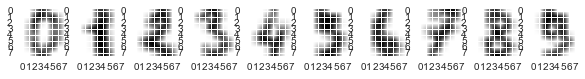

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### Let's start our questions. 

#### Part one. We have 64-dimension feature space(exclude y) X.  (5pts+5pts)
a. Assume we need to use PCA to transform X to Xproj.Plot the explained variance for each eigenvector(direction) from high to low in one scatter plot. 

In [5]:
from scipy import stats
# PCA module
from sklearn.decomposition import PCA

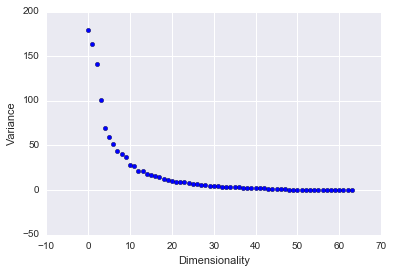

In [12]:
n=64
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
plt.scatter(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Variance")
plt.show()

b. What is the total variance of X? How many eigenvectors(directions) do we need to choose if we want to preserve 90% variance of the original data.

In [13]:
print("total variance:{}".format(np.sum(np.var(X,0))))

total variance:1201.47873736


In [14]:
clf = PCA(0.90)# keep 90% of variance.
X_trans = clf.fit_transform(X)

In [15]:
shape(X_trans)

(1797, 21)

####  We need to choose 21 eigenvectors if we want to preserve 90% variance of the original data.

#### Part two. Let's use PCA to reduce the dimensionality of digits data set from 64 to 3. And then  visulize the transformed space on a 3 dimensional plot. Please color the points with respect to their label y. (10 pts)

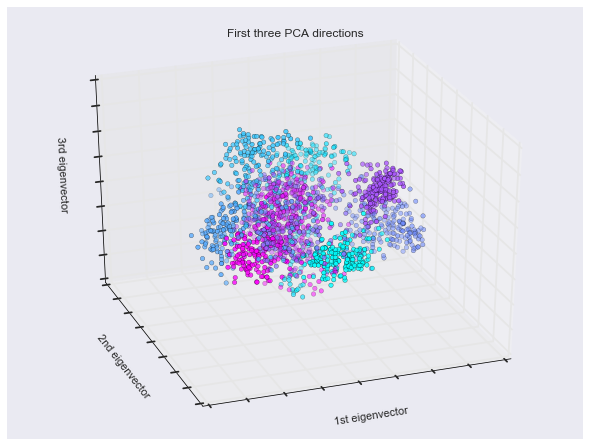

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(Xproj[:, 0], Xproj[:, 1], Xproj[:, 2], c=y,
           cmap=plt.cm.cool)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

#### Part three. Take the data for digits 3 and 8 from the origional data set and call it data1. (20pts)

In [17]:
three = data['y'] == 3
eight = data['y'] == 8
data1 = pd.concat([data[three], data[eight]])

a. If we use PCA for dimensionality reduction on data1, how big is the percentage of total variance, that the first and second eigenvectors could explain? 

In [18]:
X1 = data1.ix[:,'x1':]
Y = np.asarray(data1.ix[:,'y'])

In [19]:
n=64
pca1 = PCA(n)
Xproj1 = pca1.fit_transform(X1)

In [75]:
# the percentage the first and second eigenvectors could explain
print pca1.explained_variance_ratio_[0:2]

[ 0.24812715  0.11415463]


b. Now let's visulize the dimensional feature space of data1 by the first two eigenvectors. Color your points according to the digits they represent.

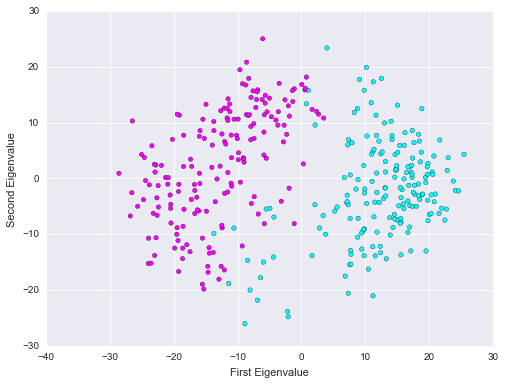

In [20]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj1[:, 0], Xproj1[:, 1], c=Y, cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue')
plt.ylabel('Second Eigenvalue')
plt.show()

c. Visulize the feature space using third and fourth eigenvectors(directions).

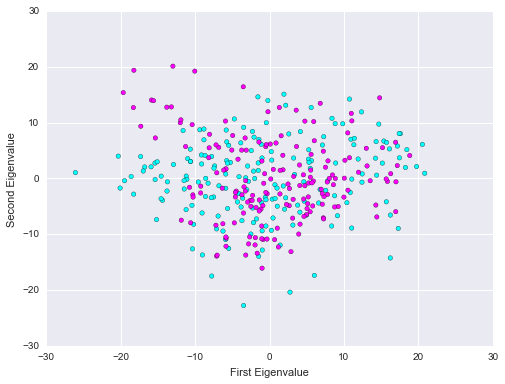

In [21]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj1[:, 2], Xproj1[:, 3], c=Y, cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue')
plt.ylabel('Second Eigenvalue')
plt.show()

d. Visulize the feature space using the last two eigenvectors(directions).

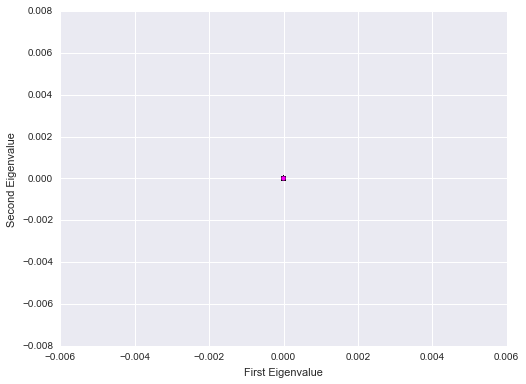

In [22]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj1[:, -2], Xproj1[:, -1], c=Y, cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue')
plt.ylabel('Second Eigenvalue')
plt.show()

##### Q5. (30 pts)

In [18]:
data=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474//ADS_Data/session06/data_hw_3_4.csv")
data.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


#### A. Run a linear regression : Y~x1+..+x15 (without constant) and report the summary of this regression result. (5pts)

In [19]:
x=data.iloc[:,1:]
y=np.asarray(data.Y)

In [20]:
from sklearn.linear_model import LinearRegression
ols=LinearRegression(fit_intercept=False)
ols.fit(x,y)
print ols.coef_

[  3.30258760e+00  -4.86088640e+00  -4.06746944e+00   3.28908333e+00
   4.60963667e+00  -2.63044140e-03  -3.57527486e-02  -1.49487580e-01
   5.63942595e-02  -1.86047791e-02  -3.10677586e-02   5.53492856e-02
  -6.76472912e-02  -9.38515166e-02   2.64579849e-02]


In [21]:
import statsmodels.api as sm
res=sm.OLS(y,x).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     7.682
Date:                Sat, 22 Oct 2016   Prob (F-statistic):           3.73e-07
Time:                        18:48:10   Log-Likelihood:                -64.562
No. Observations:                  50   AIC:                             159.1
Df Residuals:                      35   BIC:                             187.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.3026      1.692      1.951      0.0

#### B. Demonstrate the overfitting problem by 1000 times cross-validation.  Report average OS and IS R-squared.  (10 pts)

In [22]:
# Using cross validation.
R_IS=[]
R_OS=[]

n=1000
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
    
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.806269271726
OS R-squared for 1000 times is 0.26589261287


#### C. Repeat A and B on features after feature selection(p value<0.05). (5pts)

In [23]:
### feature selection by p-values.
res=sm.OLS(y,x.iloc[:,[7,12,13]]).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.1933
Date:                Sat, 22 Oct 2016   Prob (F-statistic):              0.900
Time:                        18:48:16   Log-Likelihood:                -100.68
No. Observations:                  50   AIC:                             207.4
Df Residuals:                      47   BIC:                             213.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x8             0.0054      0.046      0.116      0.9

In [24]:
# Using cross validation after feature selection.
R_IS=[]
R_OS=[]
n=1000 
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(np.asarray(x.iloc[:,[7,12,13]]), y, test_size=0.33)# 33%data go to training data
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.00897272669179
OS R-squared for 1000 times is -0.265624112476


#### D. Transform the data set by PCA and keep all 15 eigenvectors(directions). Call the new data set after transformation Xproj. And repeat questions A and B using Xproj. (10 pts)

In [25]:
n=15 
pca = PCA(n)
Xproj = pca.fit_transform(x)

In [26]:
res=sm.OLS(y,pd.DataFrame(Xproj)).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     10.74
Date:                Sat, 22 Oct 2016   Prob (F-statistic):           5.31e-09
Time:                        18:48:21   Log-Likelihood:                -57.896
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      35   BIC:                             174.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
0              0.0200      0.004      5.321      0.0

In [28]:
# Using cross validation.
R_IS=[]
R_OS=[]
n=1000
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(Xproj, y, test_size=0.4)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.865144865131
OS R-squared for 1000 times is 0.385391060979


## Extra-credit assignment 

### EC1 (20 points) "Real" out of sample test. 

Review the cross-validation process of last question carefully, you will find the cross-validation is somehow "fake". The reason is that we accessed the information of validation set when we apply PCA on the whole data set.(You should know why). Redo the cross-validation part for question D in previous question. Run 100 times "real" cross-validation and report OS and IS R-squared. 

Hint: for each loop, split the data set to train and validation set, and using PCA only on training set to find the siginificant eigenvectors(directions), and then transform the test data the same way and pick the same eigenvectors for regression.    

In [37]:
R_IS=[]
R_OS=[]
pca = PCA(15)
n=1000
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
    Xproj_train = pca.fit_transform(X_train)
    res1=LinearRegression(fit_intercept=False)
    res1.fit(Xproj_train,y_train)
    Xproj_test = pca.fit_transform(X_test)
    res2=LinearRegression(fit_intercept=False)
    res2.fit(Xproj_test,y_test)
    R_IS.append(1-((np.asarray(res1.predict(Xproj_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res2.predict(Xproj_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.846900382087
OS R-squared for 1000 times is 0.887080691328


### EC2. When PCA could not work?  (20 points). 

Generate a 2 dimensional feature space with labels to show PCA does not work in the case you made. Plot your data set and explain your reason. This is an open question. Any data set which have two dimensional feature space with good explaination why PCA does not work should be fine.

#### If PCA does not work, the features either have non-linear relationships or no relationships at all. 

In [44]:
y = pd.DataFrame()
y['y'] = np.arange(100)
x = pd.DataFrame()
x['x1'] = np.arange(100)
x['x2'] = x.x1**2

In [46]:
x.head()

,x1,x2
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


In [47]:
n=2 
pca = PCA(n)
Xproj = pca.fit_transform(x)
res=sm.OLS(y,pd.DataFrame(Xproj)).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     16.66
Date:                Sat, 22 Oct 2016   Prob (F-statistic):           5.90e-07
Time:                        21:00:18   Log-Likelihood:                -532.09
No. Observations:                 100   AIC:                             1068.
Df Residuals:                      98   BIC:                             1073.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
0              0.0095      0.002      5.586      0.0

In [49]:
# Using cross validation.
R_IS=[]
R_OS=[]
n=100
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(Xproj, y, test_size=0.4)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 100 times is -1.93123675591
OS R-squared for 100 times is -2.18603038684


### EC3.(Multiple choice, 5pts. Please add short explaination)
Suppose you have two different feature selection choices A and B, and we have already separated the dataset into training set and validation set. Now we want to use "out-of-sample" $R^2$ to evaluate the model prediction power. The regular $R^2$ and adjusted $R^2$ are denoted as $R_A^2$($R_B^2$) and $adR_A^2$ ($adR_B^2$), respectively. Select all statements that are true: 

A. For each selection, we always have $R_A^2 > adR_A^2$ and $R_B^2 > adR_B^2$  
B. For each selection, we may have $R_A^2 < adR_A^2$ or $R_B^2 < adR_B^2$  
C. If $R_A^2 > R_B^2$ then $adR_A^2$ must be greater than $adR_B^2$, vice versa  
D. If $R_A^2 > R_B^2$, $adR_A^2$ still can be less than $adR_B^2$, vice versa  

#### AD
The adjusted R2 of one data is less than regular R2 cause it reduced the number of features.
But A and B are of different feture selection so there is no comparability of the adjusted R2.